In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
%matplotlib inline

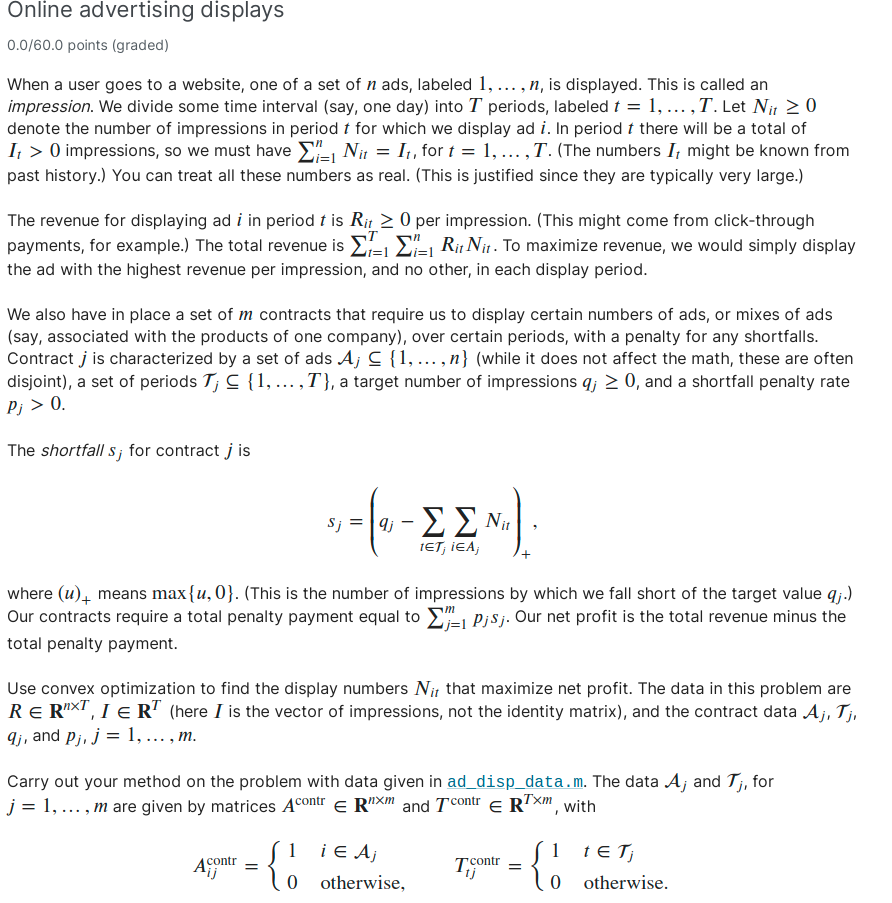

# Fomulation

$X = {A^{contr}}^T N T^{contr}$

dimentions:  
$(m \times n) (n \times T) (T \times m) = (m \times m)$

So:  
$s = (q - diag(X))_+$

# Problem data

In [2]:
R = np.loadtxt("R.csv", delimiter = ',')
I = np.loadtxt("I.csv", delimiter = ',')
p = np.loadtxt("p.csv", delimiter = ',')
q = np.loadtxt('q.csv', delimiter = ',')
Tcontr = np.loadtxt("Tcontr.csv", delimiter = ',')
Acontr = np.loadtxt("Acontr.csv", delimiter = ',')
T = I.shape[0]
n = R.shape[0]
assert (n,T) == R.shape
m = q.shape[0]
assert Acontr.shape == (n,m)
assert Tcontr.shape == (T,m)

# Solving

In [3]:
N = cp.Variable((n,T), nonneg = True)
C = [
    N.T @ np.ones(n) == I,   
]
revenue = cp.sum(cp.multiply(N,R))
s = cp.pos(q - cp.diag(Acontr.T @ N @ Tcontr))
total_penality = s @ p
obj = cp.Maximize(revenue - total_penality)

prob = cp.Problem(obj,C)
prob.solve()
assert prob.status == cp.OPTIMAL
N_ = N.value
p_ = prob.value

In [4]:
print('Optimal net profit:',p_)
print('revenue:',revenue.value)
print('total penality', total_penality.value)

Optimal net profit: 230.56604516573933
revenue: 268.2319078596905
total penality 37.665862688924435


## Strategy: only maximum revenue ads per impression allowed

In [5]:
prob = cp.Problem(cp.Maximize(revenue),C)
prob.solve()
assert prob.status == cp.OPTIMAL
N_ = N.value
p_ = prob.value

In [6]:
print('Optimal net profit:',revenue.value - total_penality.value)
print('revenue:',revenue.value)
print('total penality', total_penality.value)

Optimal net profit: 72.84149213022994
revenue: 305.101711668049
total penality 232.26021953781907
